## Preparación del Conjunto de Datos
En esta sección, preparamos el conjunto de datos y definimos las secuencias de aminoácidos que analizaremos. Este proceso generará embeddings, lo cual puede llevar unos minutos.

Primero, seleccionamos las secuencias de interés. Luego, creamos los conjuntos de datos de entrenamiento y prueba, y preparamos los cargadores de datos para el entrenamiento y evaluación del modelo.


In [1]:
import pandas as pd

df = pd.read_csv('../DATASETS/predictor_dataset.csv')
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1261
Number of columns: 17


In [2]:
import numpy as np

# Load the embedded dataset and attention weights
prott5_embeddings_dict = np.load("prott5_embeddings.npy", allow_pickle=True).item()
prott5_attention_weights_dict = np.load("prott5_attention_layers.npy", allow_pickle=True).item()

print(f"prott5_embeddings_dict keys: {prott5_embeddings_dict.keys()}")
print(f"prott5_attention_weights_dict keys: {prott5_attention_weights_dict.keys()}")

prott5_embeddings_dict keys: dict_keys(['UniProt IDs', 'embeddings'])
prott5_attention_weights_dict keys: dict_keys(['UniProt IDs', 'attention_layers'])


In [4]:
import importlib
from ProteinDataset import ProteinDataset

# Create an instance of ProteinDataset
protein_dataset = ProteinDataset(df,
                                 embeddings=prott5_embeddings_dict, 
                                 id_embedding='UniProt IDs', 
                                 value_column_embedding='embeddings',
                                 attention_weights=prott5_attention_weights_dict, 
                                 id_attention_weights='UniProt IDs',
                                 value_column_attention='attention_layers',
                                 solve_inconsitence=True)

Checking consistency...
Number of duplicates: 1259
Use the remove_duplicates function to remove duplicates.


TypeError: list indices must be integers or slices, not str

In [19]:
# Plot TSNE for embeddings
protein_dataset.plot_tsne(attribute='Class', combined=False)

# Plot TSNE for combined embeddings and attention weights
protein_dataset.plot_tsne(attribute='Class', combined=True)

Data shape: (1219, 1024)


ValueError: array length 1219 does not match index length 1229

<Figure size 1600x1000 with 0 Axes>

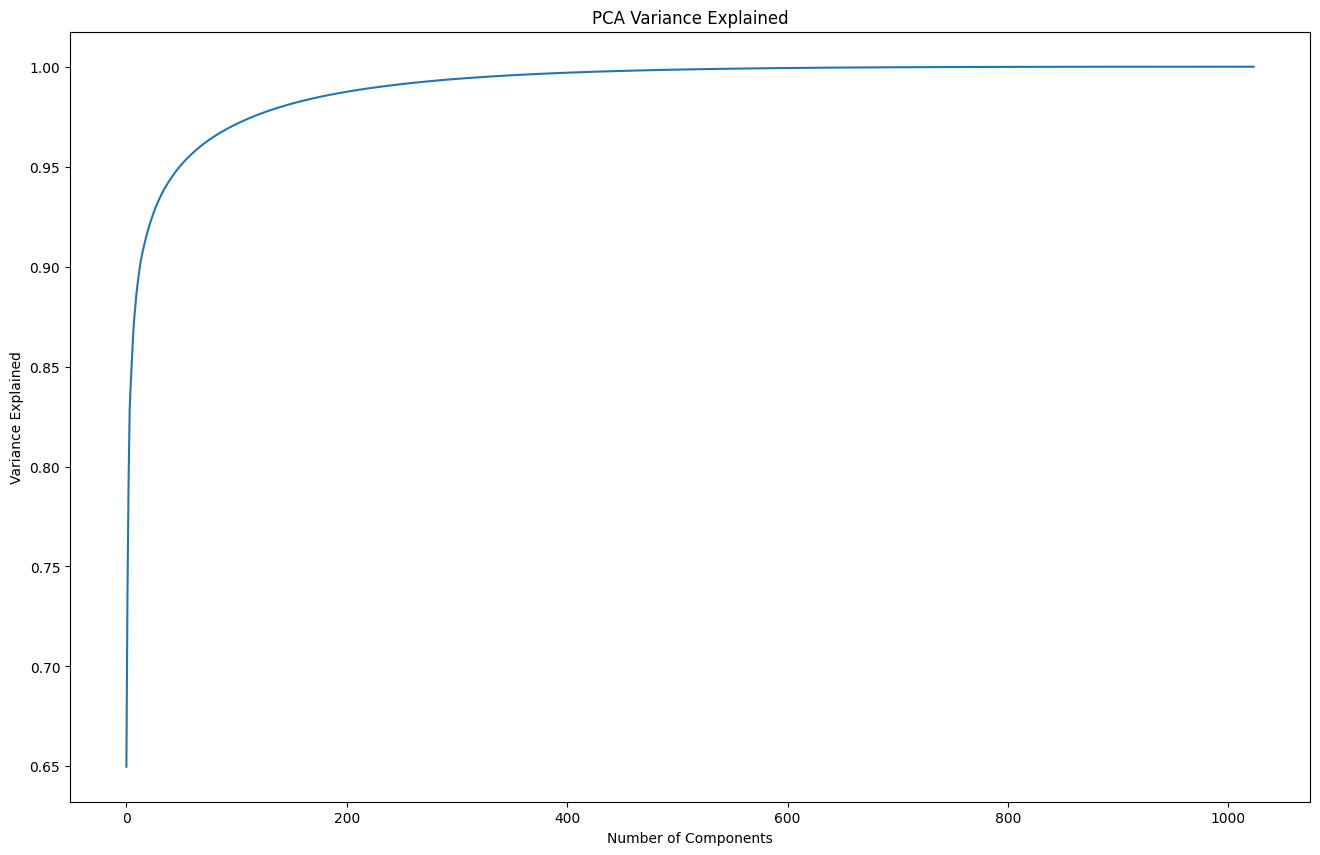

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1219,) + inhomogeneous part.

In [7]:
# Plot PCA variance explained for embeddings
protein_dataset.plot_pca_variance(combined=False)
protein_dataset.plot_pca_variance(combined=True)

In [22]:
# Plot k-means clustering for embeddings
protein_dataset.plot_kmeans(n_clusters=3, combined=False)

TypeError: list indices must be integers or slices, not tuple

<Figure size 1600x1000 with 0 Axes>